<a href="https://colab.research.google.com/github/HB5101/Stock-Price-Prediction/blob/main/Stock_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Conv1D, TimeDistributed, MaxPooling1D, Flatten
from keras.layers import Dense

Using TensorFlow backend.


# TIME SERIES 

In [ ]:
data=pd.read_csv("/content/NIFTY 50.csv")

In [ ]:
data_dup=data.copy()

In [ ]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Turnover     float64
P/E          float64
P/B          float64
Div Yield    float64
dtype: object

In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       1
Turnover     1
P/E          0
P/B          0
Div Yield    0
dtype: int64

In [ ]:
data.describe()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
count,5061.000000,5061.000000,5061.000000,5061.000000,5.060000e+03,5.060000e+03,5061.000000,5061.000000,5061.000000
mean,5216.237977,5251.466667,5174.455009,5213.433768,1.664416e+08,6.826187e+10,20.037014,3.547459,1.428164
std,3274.529979,3283.745772,3257.303609,3270.073955,1.419567e+08,5.482144e+10,4.194021,0.799204,0.402380
min,853.000000,877.000000,849.950000,854.200000,1.394931e+06,4.012000e+08,10.680000,1.920000,0.590000
25%,1983.200000,1999.700000,1964.650000,1982.750000,7.772303e+07,3.017642e+10,17.110000,3.030000,1.180000
50%,5096.700000,5135.550000,5038.850000,5090.850000,1.370860e+08,5.793170e+10,20.090000,3.470000,1.330000
75%,7895.400000,7929.100000,7837.700000,7887.800000,1.983021e+08,8.493517e+10,22.860000,3.790000,1.550000
max,12430.500000,12430.500000,12321.400000,12362.300000,1.811564e+09,5.970553e+11,29.900000,6.550000,3.180000


In [ ]:
data["Date"]=pd.DatetimeIndex(data["Date"])

In [ ]:
data.set_index("Date",inplace=True)

In [ ]:
data

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.20,25358322.0,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872.0,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431.0,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875.0,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945.0,1.914630e+10,26.25,4.69,0.94
...,...,...,...,...,...,...,...,...,...
2020-05-04,9533.50,9533.50,9266.95,9293.50,NaN,NaN,21.39,2.65,1.64
2020-05-05,9429.40,9450.90,9190.75,9205.60,725196178.0,2.970020e+11,21.19,2.62,1.65
2020-05-06,9226.80,9346.90,9116.50,9270.90,722185448.0,3.079810e+11,21.34,2.64,1.64


In [ ]:
data.interpolate("time",inplace=True)

In [ ]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Turnover     0
P/E          0
P/B          0
Div Yield    0
dtype: int64

In [ ]:
groups=data.columns
i=1

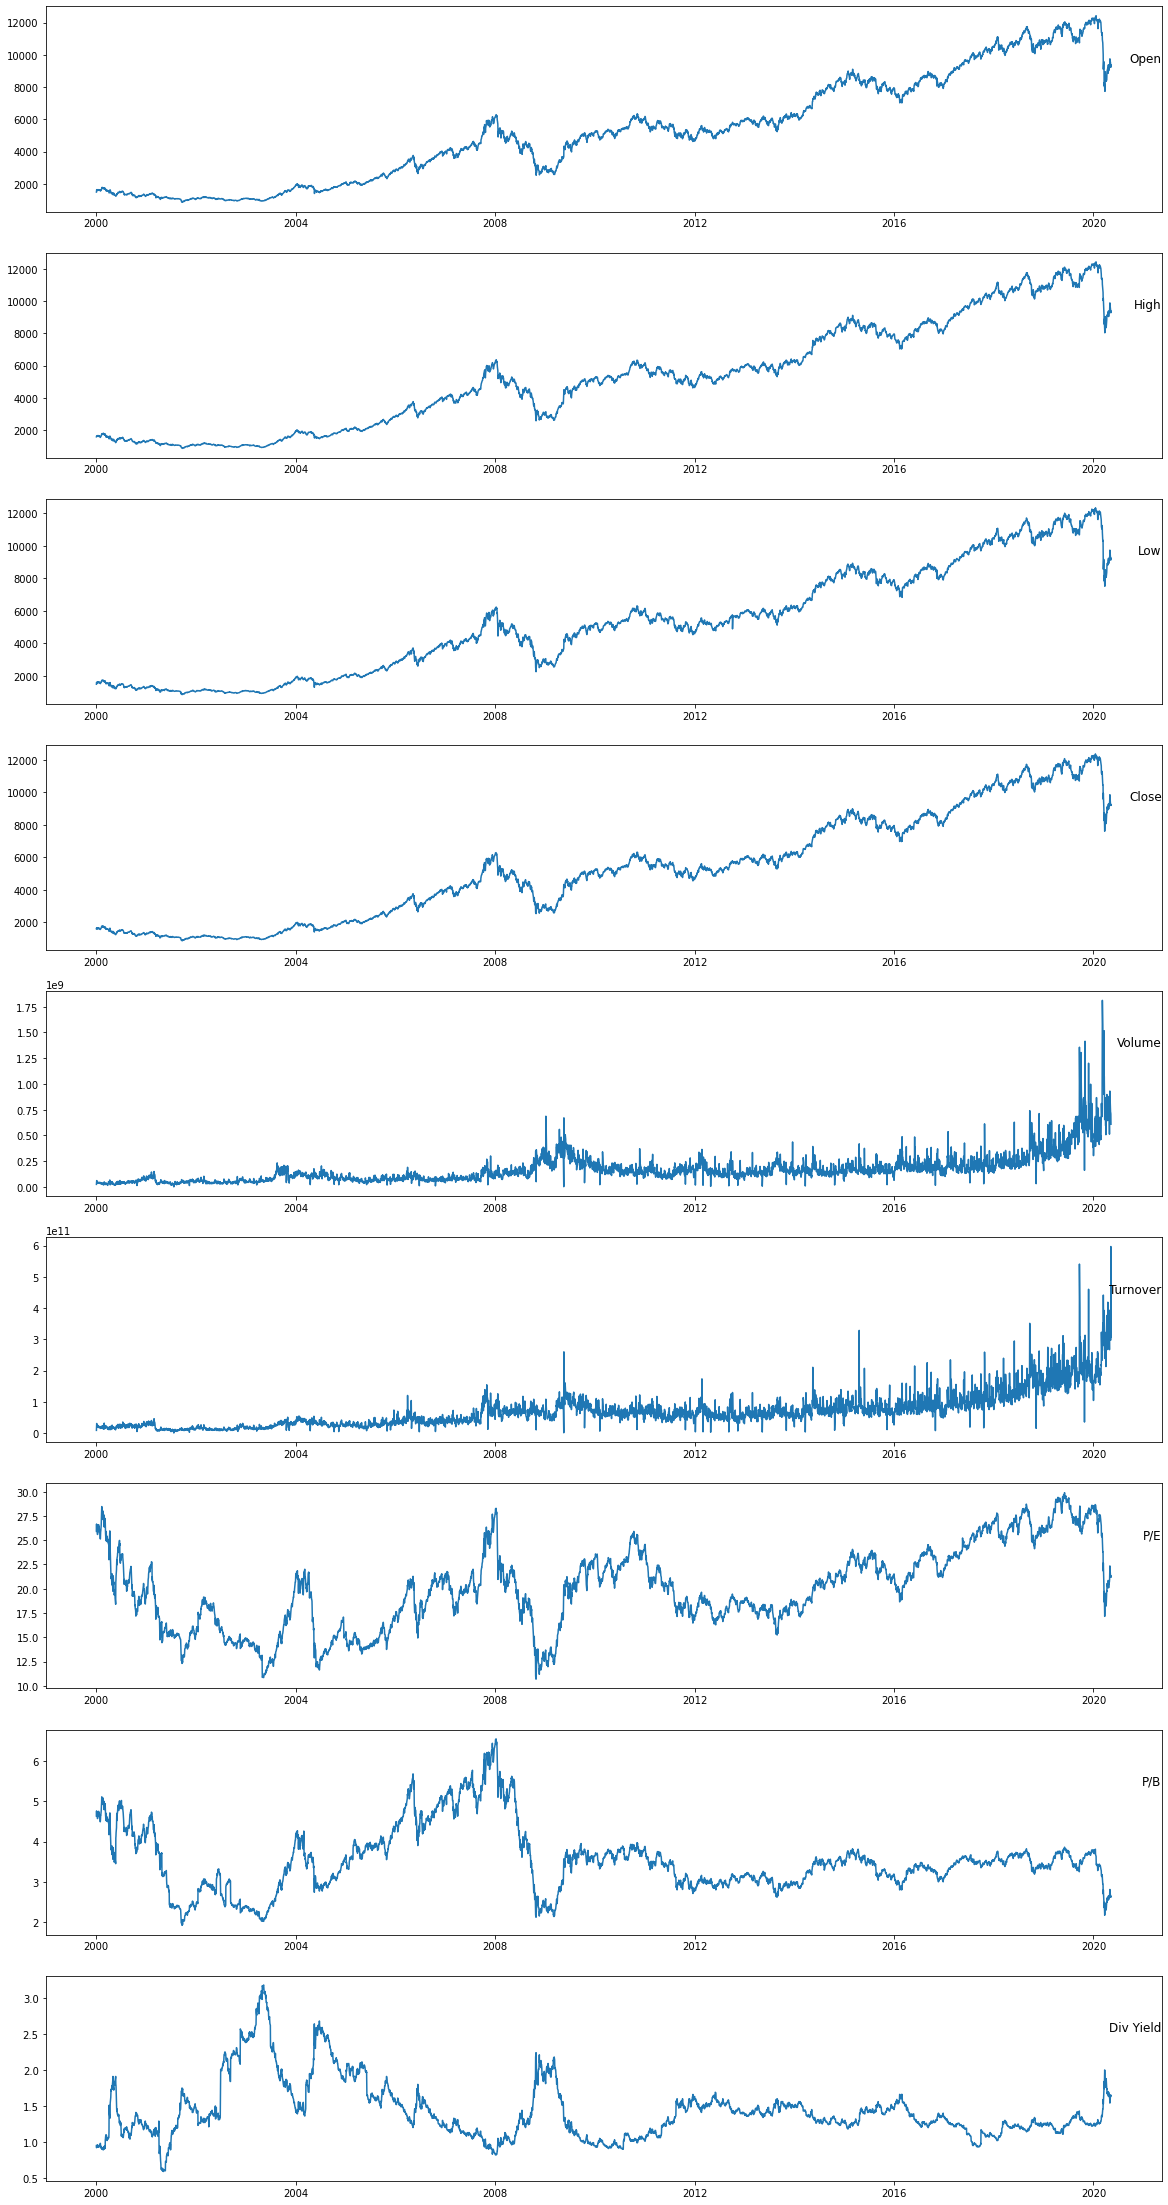

In [ ]:
plt.figure(figsize=(20,40))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(data[group])
	plt.title(group,y=0.7,loc='right')
	i += 1
plt.show()

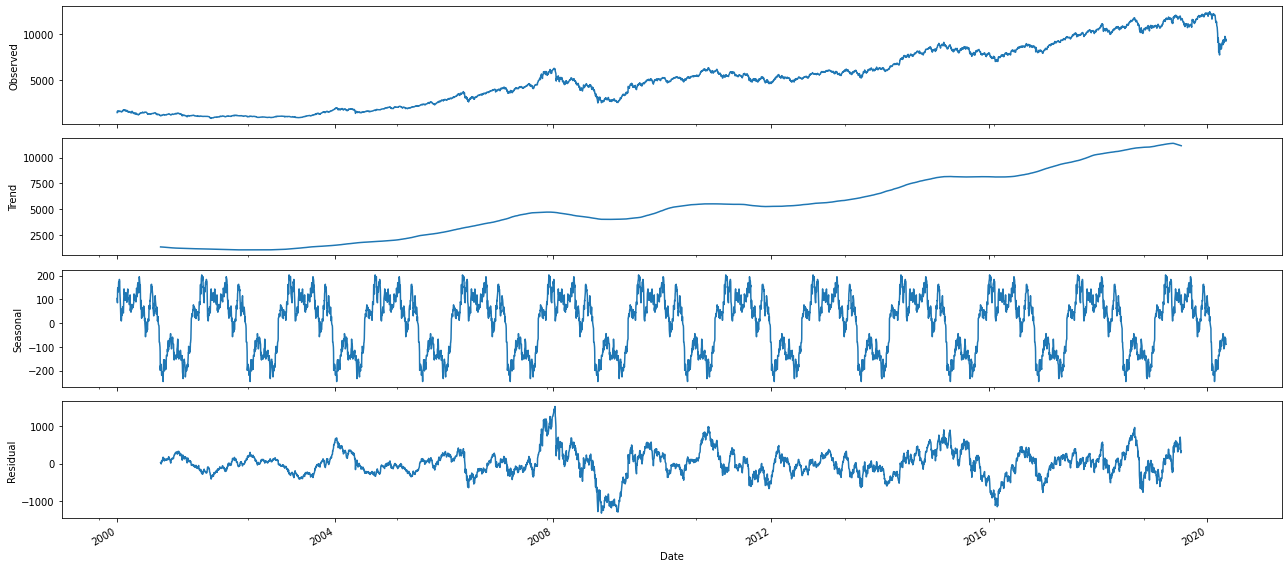

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data["Open"], model='additive',freq=400)
fig = decomposition.plot()
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig=px.line(data_dup,x="Date",y=decomposition.seasonal)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
data12=data['Open']

In [ ]:
data12

Date
2000-01-03    1482.15
2000-01-04    1594.40
2000-01-05    1634.55
2000-01-06    1595.80
2000-01-07    1616.60
               ...   
2020-05-04    9533.50
2020-05-05    9429.40
2020-05-06    9226.80
2020-05-07    9234.05
2020-05-08    9376.95
Name: Open, Length: 5061, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(data)

In [ ]:
scaler1=MinMaxScaler(feature_range=(0,1))
data12=scaler1.fit_transform(np.array(data12).reshape(-1,1))

In [ ]:
data12

array([[0.05434247],
       [0.064038  ],
       [0.06750594],
       ...,
       [0.72328223],
       [0.72390844],
       [0.73625135]])

In [ ]:

def create_dataset(dataset, look_back=0):
	dataX, dataY = [], []
	for i in range(look_back,len(dataset)):
		a = dataset[i-look_back:i]
		#a=scaler.fit_transform(a)
		dataX.append(a)
		dataY.append(data12[i][0])
	return np.array(dataX), np.array(dataY)

In [ ]:
X,y = create_dataset(dataset,look_back=30)

In [ ]:
X.shape

(5031, 30, 9)

In [ ]:
#X = X.reshape((X.shape[0],6,10,9))

In [ ]:
y.shape

(5031,)

In [ ]:
time = np.arange(len(dataset))

In [ ]:
split_time= 4500
train_x = X[:split_time]
train_y = y[:split_time]
test_x = X[split_time:]
test_y = y[split_time:]

In [ ]:
train_x.shape

(4500, 30, 9)

In [ ]:
train_y.shape

(4500,)

In [ ]:
test_y.shape

(531,)

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model=Sequential()
#model.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', input_shape=(30,9)))
model.add(LSTM(32,input_shape=(30, 9)))
#model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(2))
model.add(Dense(1))

In [ ]:
"""
model1 = Sequential()
model1.add(Conv1D(filters=32, kernel_size=5, strides=1, activation='relu', input_shape=(60,9)))
model1.add(LSTM(64, return_sequences = True))
model1.add(Dropout(0.25))
#model1.add(LSTM(16,return_sequences=True))
model1.add(LSTM(64))
model1.add(Dropout(0.2))
#model1.add(Dense(25,activation="relu"))
model1.add(Dense(1))"""

'\nmodel1 = Sequential()\nmodel1.add(Conv1D(filters=32, kernel_size=5, strides=1, activation=\'relu\', input_shape=(60,9)))\nmodel1.add(LSTM(64, return_sequences = True))\nmodel1.add(Dropout(0.25))\n#model1.add(LSTM(16,return_sequences=True))\nmodel1.add(LSTM(64))\nmodel1.add(Dropout(0.2))\n#model1.add(Dense(25,activation="relu"))\nmodel1.add(Dense(1))'

In [ ]:

"""model1 = Sequential()
model1.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, strides=1, activation='relu'), input_shape=(None,10,9)))
model1.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model1.add(TimeDistributed(Flatten()))
model1.add(LSTM(50, activation='relu'))
model1.add(Dense(1))"""


"model1 = Sequential()\nmodel1.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, strides=1, activation='relu'), input_shape=(None,10,9)))\nmodel1.add(TimeDistributed(MaxPooling1D(pool_size=2)))\nmodel1.add(TimeDistributed(Flatten()))\nmodel1.add(LSTM(50, activation='relu'))\nmodel1.add(Dense(1))"

In [ ]:
model.summary()
#regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                825       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 52        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
Total params: 6,256
Trainable params: 6,256
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mae", optimizer = 'adam')
#model.compile(loss="mae", optimizer = keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9))
#regressor.compile(loss="mae", optimizer = 'adam')

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.01)
Earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history1 = model.fit(train_x, train_y, epochs=100, batch_size=70, validation_data=(test_x, test_y), callbacks=[Earlystop], verbose=2,shuffle=False)


Train on 4500 samples, validate on 531 samples
Epoch 1/100
 - 4s - loss: 0.0639 - val_loss: 0.0398
Epoch 2/100
 - 3s - loss: 0.0566 - val_loss: 0.0238
Epoch 3/100
 - 4s - loss: 0.0478 - val_loss: 0.0231
Epoch 4/100
 - 3s - loss: 0.0681 - val_loss: 0.0292
Epoch 5/100
 - 4s - loss: 0.0216 - val_loss: 0.0353
Epoch 6/100
 - 4s - loss: 0.0177 - val_loss: 0.0275


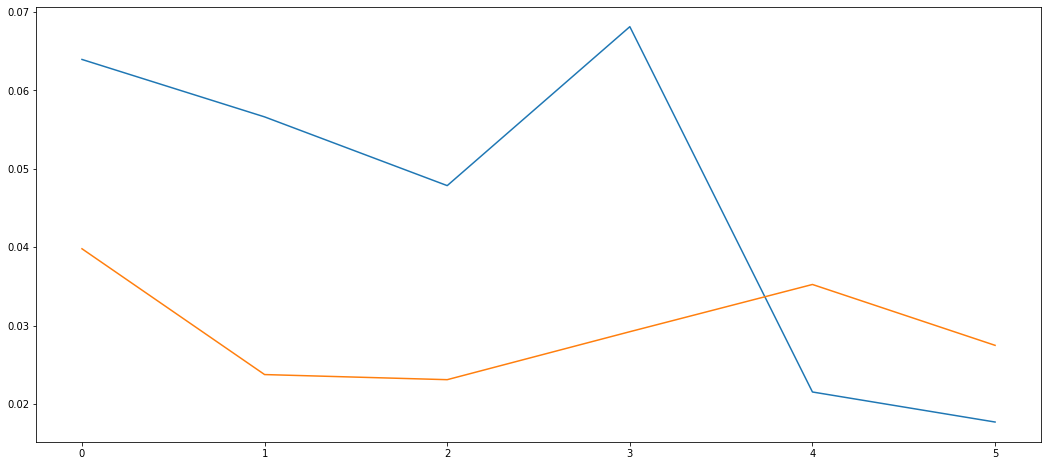

In [ ]:

import matplotlib.pyplot as plt

plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')

In [ ]:
pred = model.predict(test_x[0])
#pred=regressor.predict(test_x)

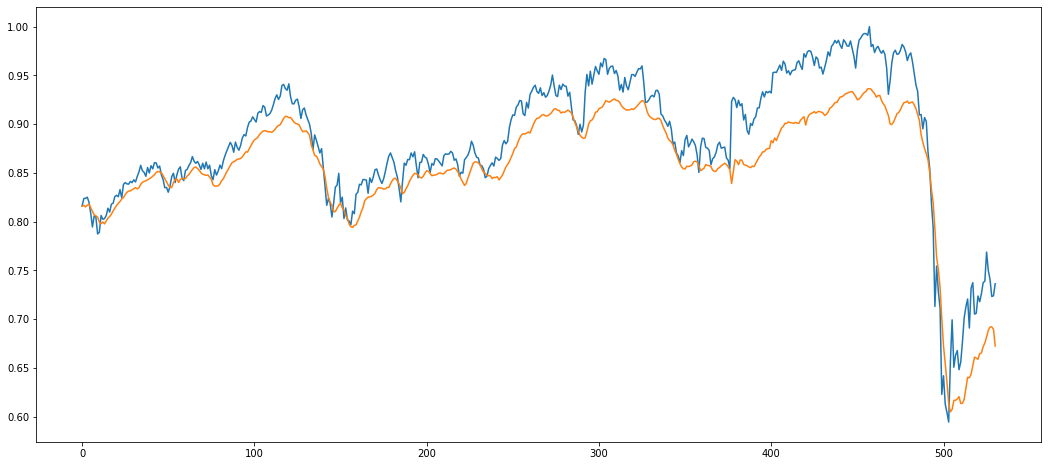

In [ ]:
plt.plot(test_y)
plt.plot(pred)

In [ ]:
pred_org = scaler1.inverse_transform(pred)
test_y_org=scaler1.inverse_transform(np.array(test_y).reshape(-1,1))

In [ ]:
mae = tf.keras.losses.MeanSquaredError()
pr=mae(test_y_org,pred_org).numpy()
np.sqrt(pr)

396.1851

In [ ]:
mae1 = tf.keras.losses.MeanAbsoluteError()
mae1(test_y_org,pred_org).numpy()

318.33124

In [ ]:
sub=pd.DataFrame(pred_org)

In [ ]:
sub.to_csv("mae_209_open_adam.csv")

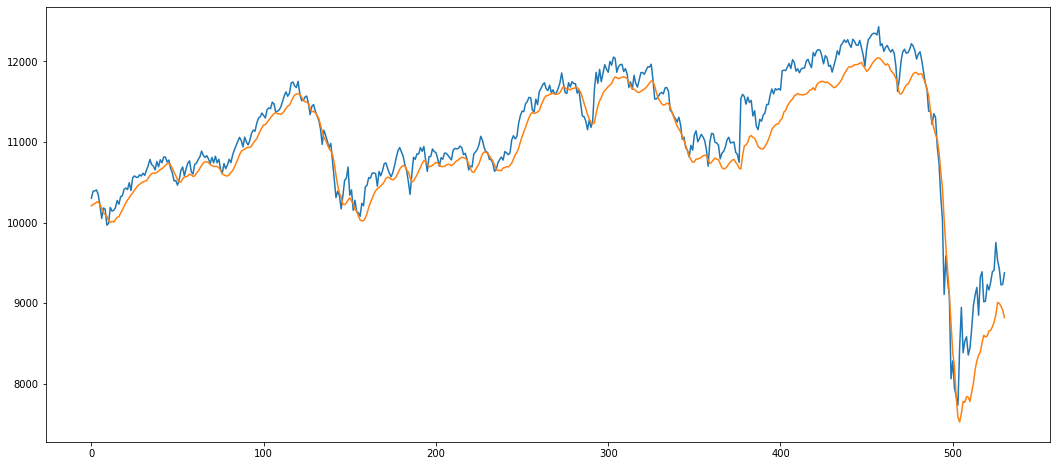

In [ ]:
plt.plot(test_y_org)
plt.plot(pred_org)